In [73]:
# Importing all the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.metrics import accuracy_score
import tensorflow as tf
print(tf.__version__)
import seaborn as sns
from tensorflow.keras import layers, models

2.12.0


### 1. Collect images of handwritten letters of one of the Indian languages 

In [74]:
df = pd.read_csv(r'Kanada_Datasets\Dig-MNIST.csv')

In [75]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 61.3 MB


In [78]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10240.000000,10240.0,10240.0,10240.0,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,...,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.0,10240.000000,10240.0,10240.0
mean,4.500000,0.0,0.0,0.0,0.019629,0.015820,0.045410,0.023047,0.048828,0.032910,...,0.027539,0.049805,0.027441,0.029883,0.103223,0.039844,0.0,0.019922,0.0,0.0
std,2.872422,0.0,0.0,0.0,1.986306,1.600903,2.926116,1.698099,3.494384,2.646949,...,2.222074,3.563559,2.397978,2.253815,4.727705,2.850847,0.0,2.015952,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
max,9.000000,0.0,0.0,0.0,201.000000,162.000000,208.000000,147.000000,255.000000,255.000000,...,220.000000,255.000000,239.000000,204.000000,255.000000,204.000000,0.0,204.000000,0.0,0.0


### 2. Split the data into train and test tests (80% train and 20% test)

In [79]:
X = df.loc[:, df.columns != "label"]
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y = df["label"]
y

0        0
1        1
2        2
3        3
4        4
        ..
10235    5
10236    6
10237    7
10238    8
10239    9
Name: label, Length: 10240, dtype: int64

In [81]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(10240, 784)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [83]:
X_train.shape

(8192, 784)

In [84]:
X_test.shape

(2048, 784)

In [85]:
y_train.shape

(8192,)

In [86]:
y_test.shape

(2048,)

### 3. Use dimension reduction techniques, PCA and t-SNE to reduce the dimensions of the data

In [87]:
# Applying PCA

pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(10240, 2)

In [88]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07556024 0.04945092]


Text(0, 0.5, 'Principal Component 2')

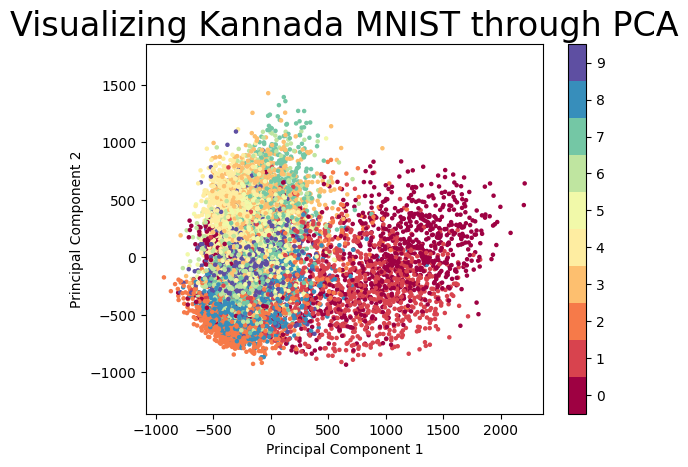

In [89]:
# Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [90]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

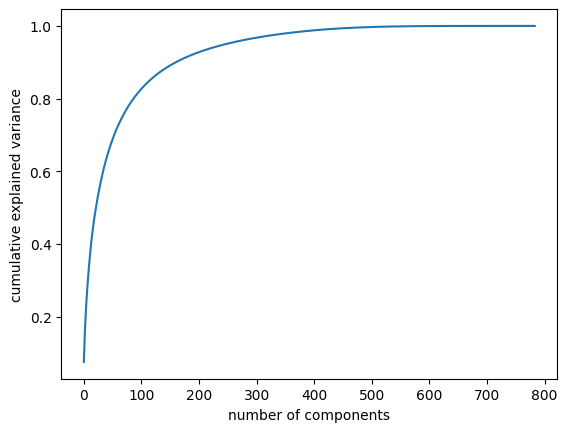

In [91]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [92]:
# Applyting t-SNE on the data
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(X)

CPU times: total: 0 ns
Wall time: 0 ns


Text(0.5, 1.0, 'Visualizing Kannada MNIST through t-SNE')

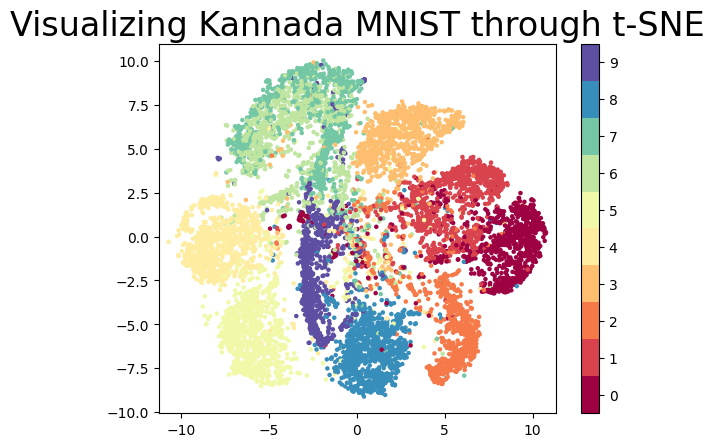

In [93]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24)

### 4. Train and Validate classification model using neural networks and support vector machines on the training data

In [94]:
# 4.1 --> Support Vector Machines

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [95]:
# 4.1 Hyper Parameter tuning --> Support Vector Machines

clf = svm.SVC(C=1.0, kernel="poly", degree=5, gamma="auto", random_state=102)
clf.fit(X_train, y_train)

SVC(degree=5, gamma='auto', kernel='poly', random_state=102)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy(%) of the SVM is: ", accuracy * 100)

Accuracy(%) of the SVM is:  88.330078125


In [99]:
# 4.2 --> classification model using neural networks

# Normalizing the data
X_train = X_train / 255.0

# One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="uint8")
# 0 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [100]:
# Whatever the size of the matrix is we reshape it to 28 X 28 matrix
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [101]:
X_train.shape

(8192, 28, 28, 1)

In [102]:
X_test.shape

(2048, 28, 28, 1)

In [103]:

# model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation = "relu", input_shape = (28, 28, 1)))
# model.add(layers.Conv2D(32, (5, 5), activation = "relu"))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Conv2D(64, (5, 5), activation = "relu"))
# model.add(layers.Conv2D(64, (5, 5), activation = "relu"))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation = "relu"))
# model.add(layers.Dropout(0.25))
# model.add(layers.Dense(10, activation = "softmax"))

In [104]:
# Hyper-parameter Tuning
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation = layers.LeakyReLU(), input_shape = (28, 28, 1)))
model.add(layers.Conv2D(32, (5, 5), activation = layers.LeakyReLU()))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (5, 5), activation = layers.LeakyReLU()))
model.add(layers.Conv2D(64, (5, 5), activation = layers.LeakyReLU()))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = layers.LeakyReLU()))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation = tf.nn.tanh))

In [105]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [106]:
model.fit(X_train, y_train, batch_size=1000, epochs=10, verbose=2)

Epoch 1/10
9/9 - 15s - loss: 6.8634 - accuracy: 0.0983 - 15s/epoch - 2s/step
Epoch 2/10
9/9 - 13s - loss: 3.4752 - accuracy: 0.0791 - 13s/epoch - 1s/step
Epoch 3/10
9/9 - 13s - loss: 2.3742 - accuracy: 0.0740 - 13s/epoch - 1s/step
Epoch 4/10
9/9 - 13s - loss: 2.3083 - accuracy: 0.0640 - 13s/epoch - 1s/step
Epoch 5/10
9/9 - 14s - loss: 2.2776 - accuracy: 0.0635 - 14s/epoch - 2s/step
Epoch 6/10
9/9 - 13s - loss: 2.2534 - accuracy: 0.0573 - 13s/epoch - 1s/step
Epoch 7/10
9/9 - 13s - loss: 2.2185 - accuracy: 0.0509 - 13s/epoch - 1s/step
Epoch 8/10
9/9 - 13s - loss: 2.1829 - accuracy: 0.0410 - 13s/epoch - 1s/step
Epoch 9/10
9/9 - 13s - loss: 2.2685 - accuracy: 0.0511 - 13s/epoch - 1s/step
Epoch 10/10
9/9 - 14s - loss: 2.2555 - accuracy: 0.0437 - 14s/epoch - 2s/step


In [107]:
# Predicting the model on the test data

y_pred_NN = model.predict(X_test)

64/64 [==============================] - 1s 14ms/step


In [108]:
# Getting the first predictions
y_pred_NN[0]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.], dtype=float32)

In [109]:
max_index = 0
for i in range(0, len(y_pred_NN[0])):
    if y_pred_NN[0][i] > y_pred_NN[0][max_index]:
        max_index = 1

print("Predicted Value : ", max_index)

Predicted Value :  0
